In [1]:
from google.colab import drive
import os

drive.mount('/content/gdrive')
root_path = 'gdrive/MyDrive/PyCharmProjects/ImageNet/'
os.chdir(root_path)

from datasets import *
from nets import *

device = th.device('cuda:0' if th.cuda.is_available() else 'cpu')
print(f"device: {device}")

Mounted at /content/gdrive
device: cuda:0


In [ ]:
# # !tar -xjvf "/content/gdrive/MyDrive/PyCharmProjects/ImageNet/_Data/HASYv2.tar.bz2" -C "/content/gdrive/MyDrive/PyCharmProjects/ImageNet/_Data/HASYv2"     #[run this cell to extract tar.bz2 files]
# !unzip "/content/gdrive/MyDrive/PyCharmProjects/ImageNet/_Data/hasy-data.zip" -d "/content/gdrive/MyDrive/PyCharmProjects/ImageNet/_Data/HASYv2/"

In [2]:
with open('.//_Data/colab_dataset.pkl', 'rb') as f:
    full_dataset = pickle.load(f)

fold = 1
ds = HASYv2Dataset()
tds = ds.cross_val(fold, True, full_dataset)
vds = ds.cross_val(fold, False, full_dataset)
del full_dataset

1. Training loss: -0.2413
	Training accuracy: 25.06%
1. Validation loss: -0.3141
	Validation accuracy: 32.32%
2. Training loss: -0.3319
	Training accuracy: 33.80%
2. Validation loss: -0.35
	Validation accuracy: 35.77%
3. Training loss: -0.3566
	Training accuracy: 36.10%
3. Validation loss: -0.3703
	Validation accuracy: 37.81%
4. Training loss: -0.373
	Training accuracy: 37.78%
4. Validation loss: -0.3869
	Validation accuracy: 39.58%
5. Training loss: -0.3927
	Training accuracy: 39.76%
5. Validation loss: -0.4074
	Validation accuracy: 41.51%
6. Training loss: -0.4174
	Training accuracy: 42.19%
6. Validation loss: -0.4402
	Validation accuracy: 44.89%
7. Training loss: -0.441
	Training accuracy: 44.69%
7. Validation loss: -0.4553
	Validation accuracy: 46.43%
8. Training loss: -0.4624
	Training accuracy: 46.82%
8. Validation loss: -0.4864
	Validation accuracy: 49.69%
9. Training loss: -0.4916
	Training accuracy: 49.75%
9. Validation loss: -0.5054
	Validation accuracy: 51.68%
10. Training l

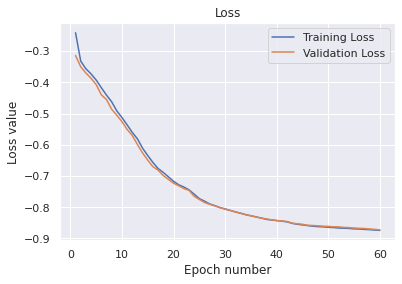

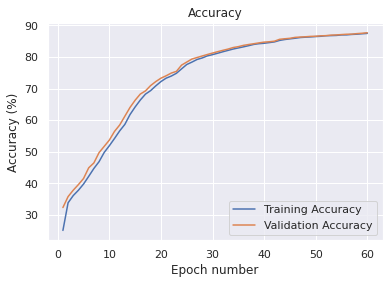

Time for running function train_model: 3575.301563501358s


In [7]:
model = TwoLayer()
tdl = DataLoader(tds, batch_size = 1, shuffle=True)
vdl = DataLoader(vds, batch_size = 10000)
train_model(model, 60, 1e-4, nn.NLLLoss(), (tdl, vdl))

In [ ]:
train_model(model, 10, 1e-4, nn.NLLLoss(), (tdl, vdl))

1. Training loss: -0.8865
	Training accuracy: 88.67%
1. Validation loss: -0.8848
	Validation accuracy: 88.72%
2. Training loss: -0.8869
	Training accuracy: 88.68%
2. Validation loss: -0.885
	Validation accuracy: 88.75%
3. Training loss: -0.8872
	Training accuracy: 88.74%
3. Validation loss: -0.8855
	Validation accuracy: 88.78%
4. Training loss: -0.8874
	Training accuracy: 88.74%
4. Validation loss: -0.886
	Validation accuracy: 88.86%
